# Загрузка и исследование данных

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

games = pd.read_csv('/datasets/games.csv')
print('Дубликатов:', games.duplicated().sum())
display(games.head(10))
games.info()
display(games.describe())

Дубликатов: 0


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
genres = games['Genre'].unique()
print('Уникальные названия жанров:', genres)
platforms = games['Platform'].unique()
print('Уникальные названия платформ:', platforms)
ratings = games['Rating'].unique()
print('Уникальные названия рейтингов:', ratings)
print('Количество уникальных названий игр:', len(games['Name'].unique()))

Уникальные названия жанров: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Уникальные названия платформ: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные названия рейтингов: ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
Количество уникальных названий игр: 11560


### Выводы:
1. В данных столбцах есть пропуски (из 16715):
* Name               16713
* Year_of_Release    16446
* Genre              16713
* Critic_Score       8137
* User_Score         10014
* Rating             9949
2. Тип данных в столбцах Year_of_Release, User_Score необходимо привести к правильным.
3. Заголовки столбцов необходимо привести к правильному виду.
4. Одни и те же игры выходили на разных платформах (т.к. уникальных названий игр гораздо меньше чем записей).

# Подготовка данных


In [8]:
games.columns = games.columns.str.lower()
games['name'] = games['name'].fillna('-----') 
print('Посмотрим - что это за записи?')
display(games[games['name']=='-----'])
# После анализа удаляем эти 2 строки с пропущенными значениями
games = games.query('name!="-----"').reset_index(drop=True) 

games['genre'] = games['genre'].fillna('unknown') 
games['genre'] = np.where(games['genre']=="NaN", 'unknown', games['genre'])
# Добавил эту строку, но пропусков там и так уже не было
games['genre'] = np.where(games['genre'].isna()==True, 'unknown', games['genre'])

games['rating'] = games['rating'].fillna('none') 
games['rating'] = np.where(games['rating']=="K-A", 'E', games['rating'])

games['year_of_release'] = games['year_of_release'].fillna(0) 
games['critic_score'] = games['critic_score'].fillna(0) 
games['user_score'] = games['user_score'].fillna(0) 

games['user_score'] = np.where(games['user_score']=="tbd", 0, games['user_score'])
games['user_score'] = games['user_score'].apply(np.float)

games['year_of_release'] = games['year_of_release'].apply(np.int)

games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

print('Проверяем:')
display(games.head())
games.info()

Посмотрим - что это за записи?


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,-----,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,-----,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Проверяем:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,none,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,none,31.38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
sum_sales          16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### Выводы:
1. TBD - эта аббревиатура расшифровывается как To Be Determined, то есть "Будет определено". Соответственно 'tbd' заменум нулями.
2. Пропуски в годах и оценках заменил нулями, чтобы можно было оперировать с этими столбцами.
3. Пропуски в рейтингах заменил на "none. Рейтинг "К-А" заменил на "Е", т.к. "К-А" - это устаревшее обозначение данной категории.
4. Пропуски в названиях игр заменил на "-----"
5. Пропуски в жанрах игр заменил на "unknown"
6. Пропуски могли быть вызваны отсутствием соответствующих данных на момент заполнения и невнимательностью оператора.

# Исследовательский анализ данных:
* Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


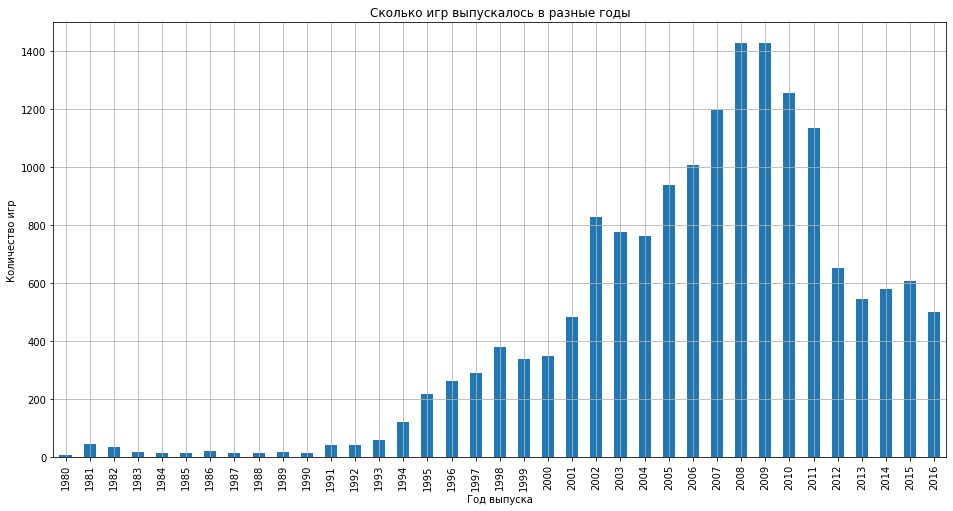

Игр с неуказанных годом выпуска                  name
year_of_release      
0                 269


In [9]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count').query('year_of_release!=0').plot(kind='bar', grid=True, figsize=(16, 8), legend=False)
plt.title('Сколько игр выпускалось в разные годы')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.show()

print('Игр с неуказанных годом выпуска', games.pivot_table(index='year_of_release', values='name', aggfunc='count').query('year_of_release==0'))

### Выводы:
1. Явных выбросов не наблдюдается
2. Годы, в которые игры выпускалось менее 200, скорее всего, можно не учитывать. Это годы до 1994 включительно - фактически заря данной индустрии.


In [11]:
norm_plat = []
for p in platforms:
    n = games.query('year_of_release==0 and platform==@p')['name'].count()
    a = games.query('platform==@p')['name'].count()
    try: pr = round((n / a)*100, 2)
    except: pr = 'не определено'
    if n>0: 
        print(f'По платформе {p} отсутствуют данные по годам выпуска в {n} из {a} случаях: {pr}%')
    else:
        norm_plat.append(p)
print('')    
print('По платформам', norm_plat, 'нет пропусков дат выхода')    
print(games.groupby('platform').apply(lambda x : (x['year_of_release'] == 0).mean()))

По платформе Wii отсутствуют данные по годам выпуска в 34 из 1320 случаях: 2.58%
По платформе GB отсутствуют данные по годам выпуска в 1 из 98 случаях: 1.02%
По платформе DS отсутствуют данные по годам выпуска в 30 из 2151 случаях: 1.39%
По платформе X360 отсутствуют данные по годам выпуска в 30 из 1262 случаях: 2.38%
По платформе PS3 отсутствуют данные по годам выпуска в 25 из 1331 случаях: 1.88%
По платформе PS2 отсутствуют данные по годам выпуска в 34 из 2161 случаях: 1.57%
По платформе GBA отсутствуют данные по годам выпуска в 11 из 822 случаях: 1.34%
По платформе 3DS отсутствуют данные по годам выпуска в 8 из 520 случаях: 1.54%
По платформе N64 отсутствуют данные по годам выпуска в 3 из 319 случаях: 0.94%
По платформе PS отсутствуют данные по годам выпуска в 7 из 1197 случаях: 0.58%
По платформе XB отсутствуют данные по годам выпуска в 21 из 824 случаях: 2.55%
По платформе PC отсутствуют данные по годам выпуска в 17 из 974 случаях: 1.75%
По платформе 2600 отсутствуют данные по год

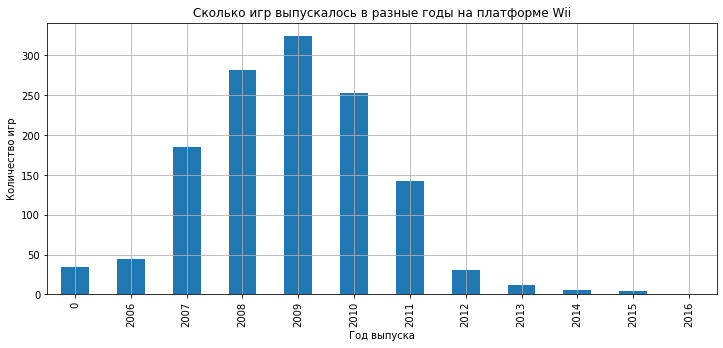

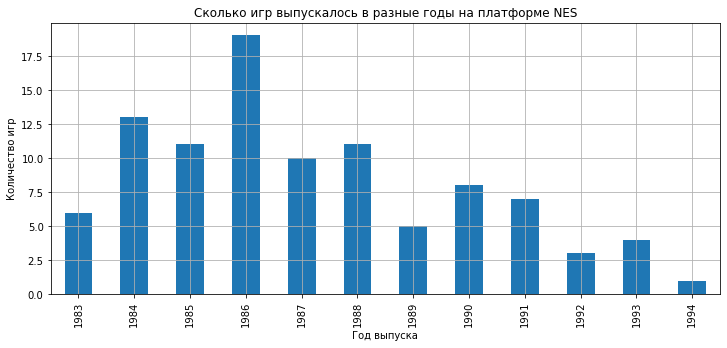

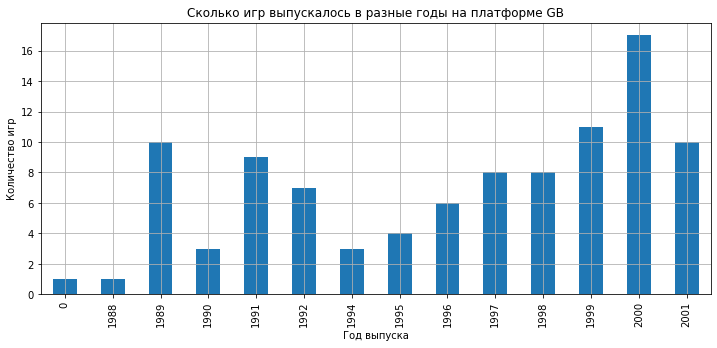

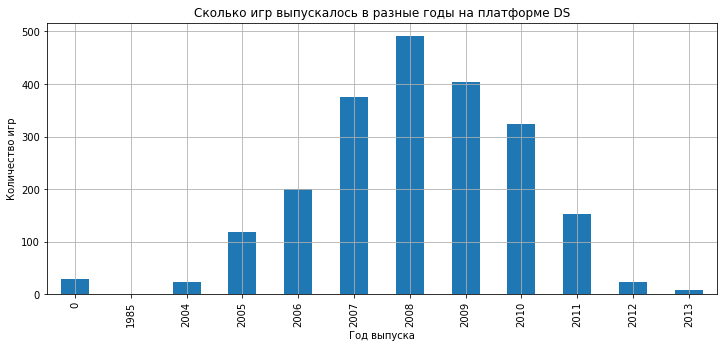

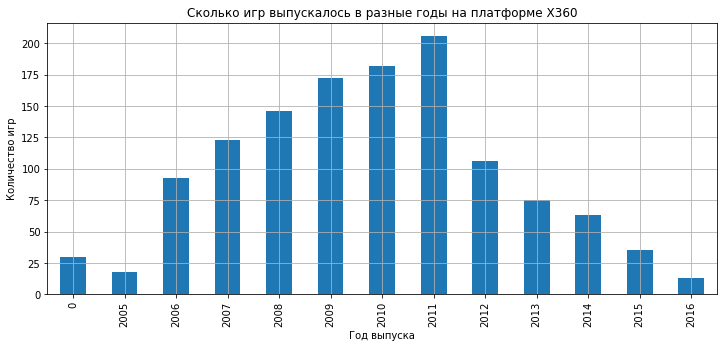

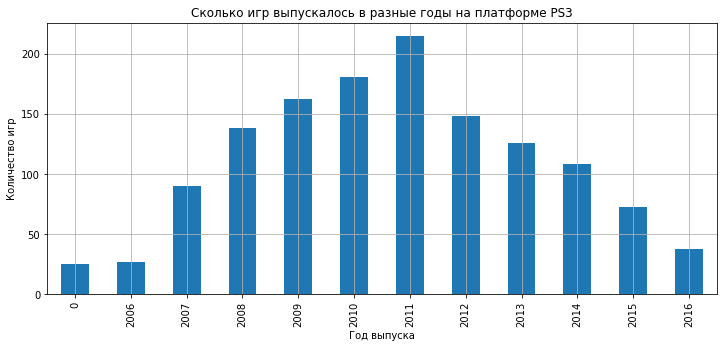

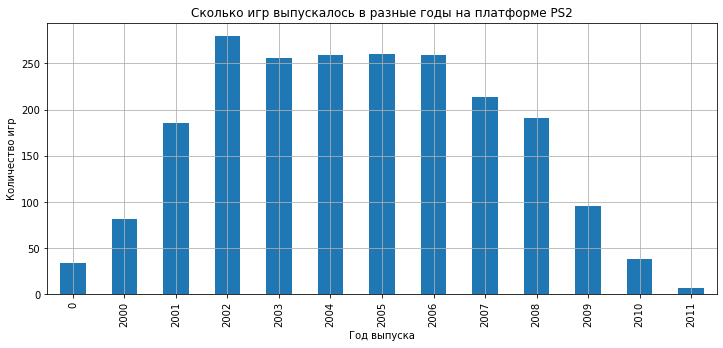

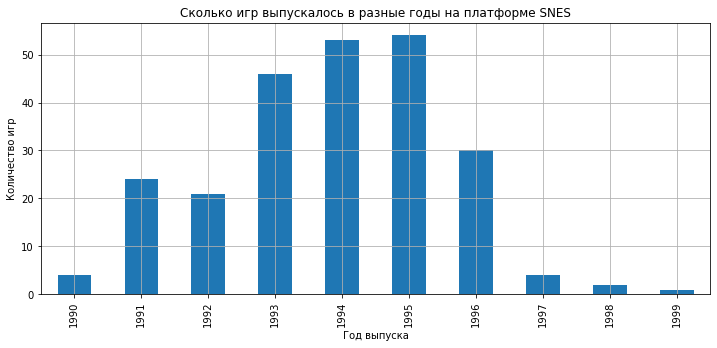

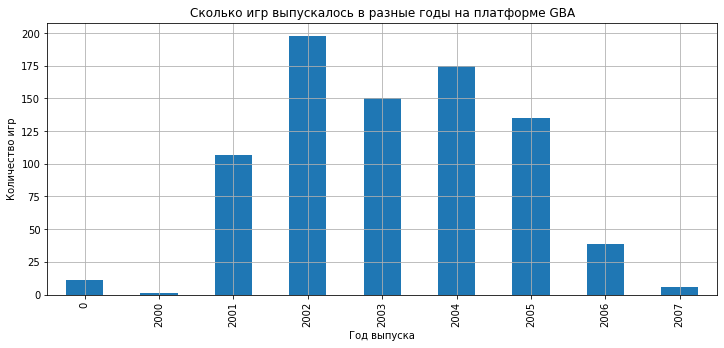

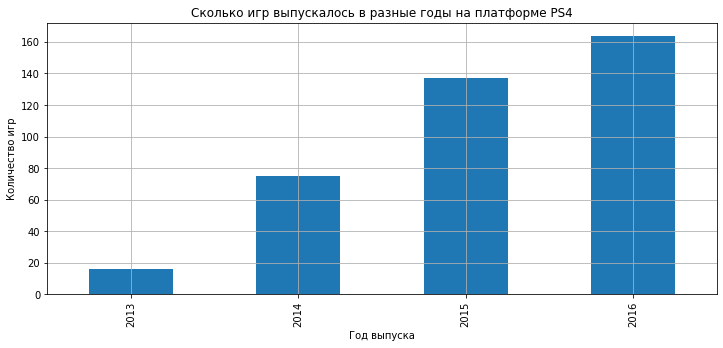

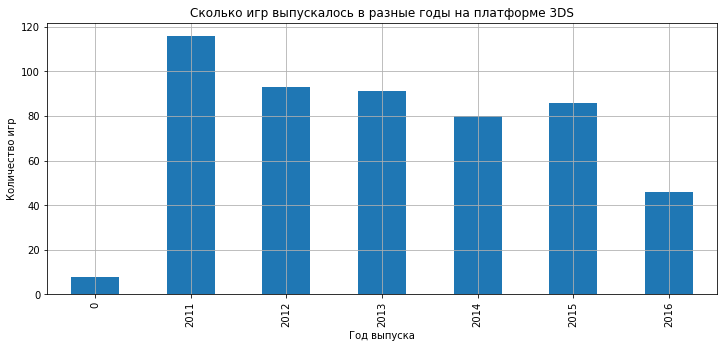

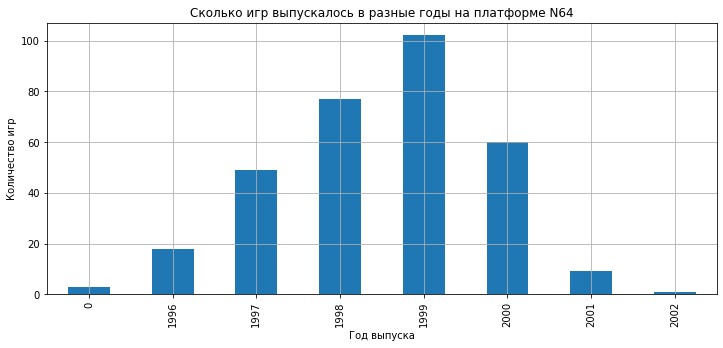

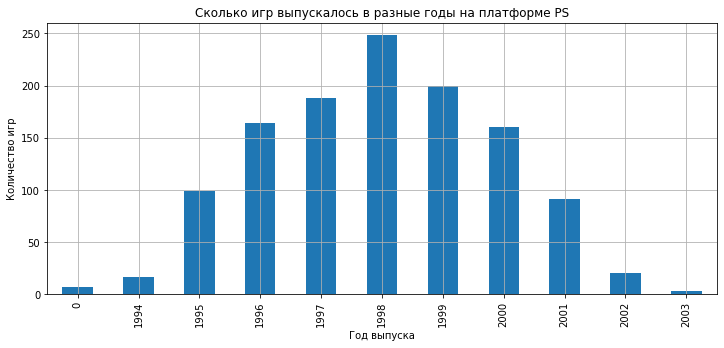

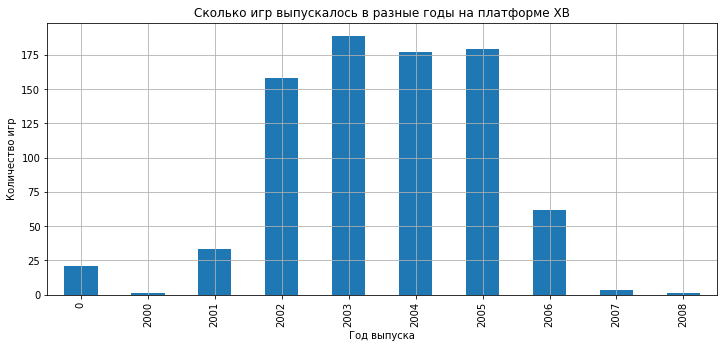

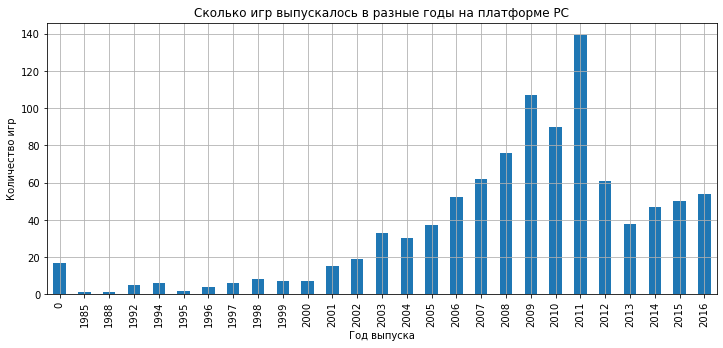

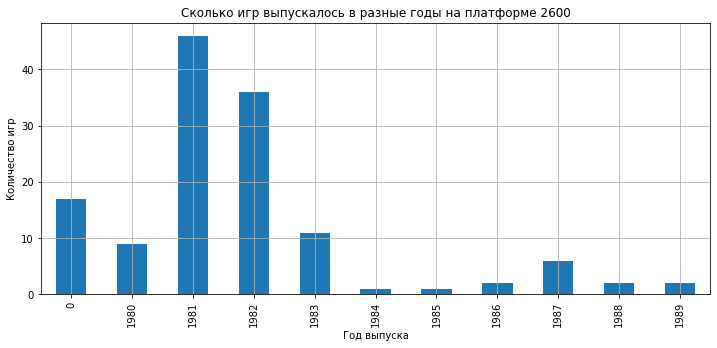

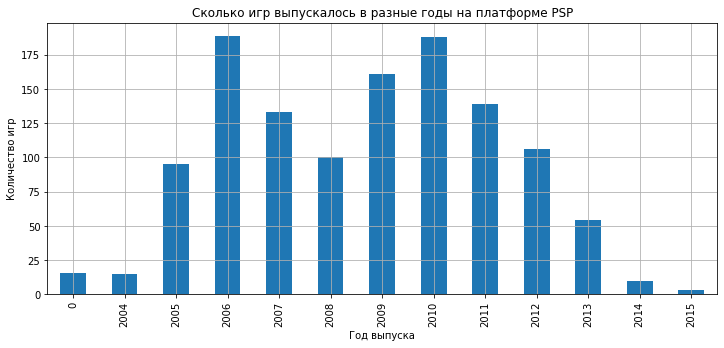

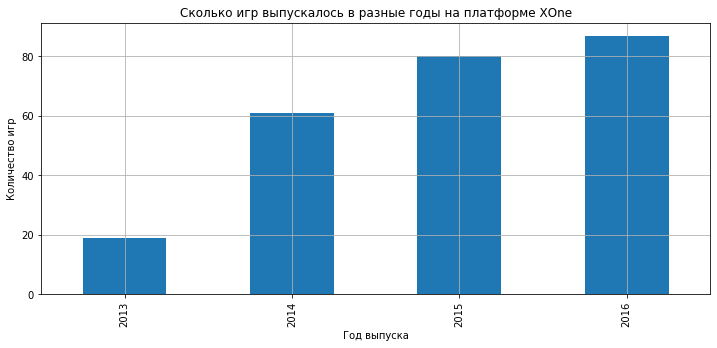

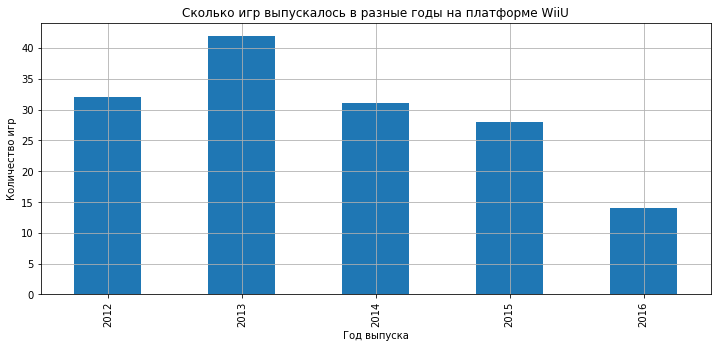

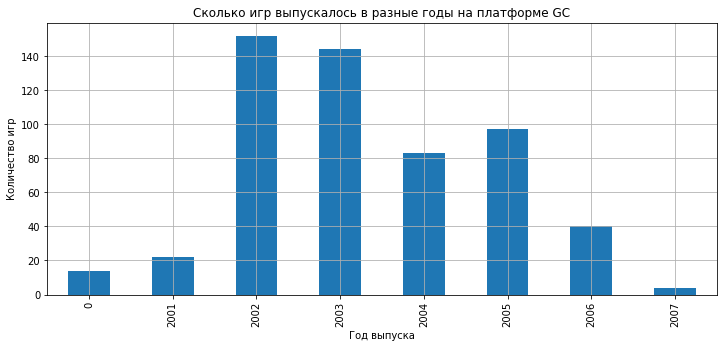

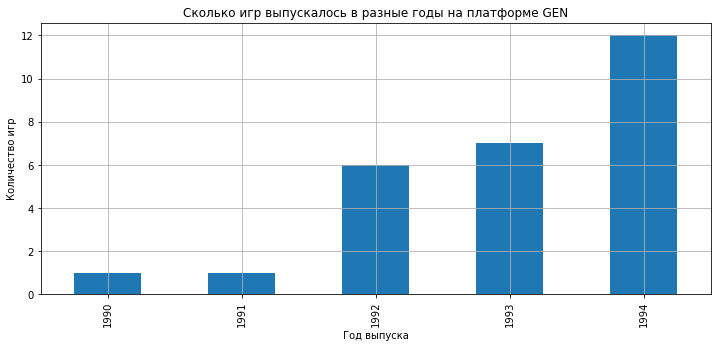

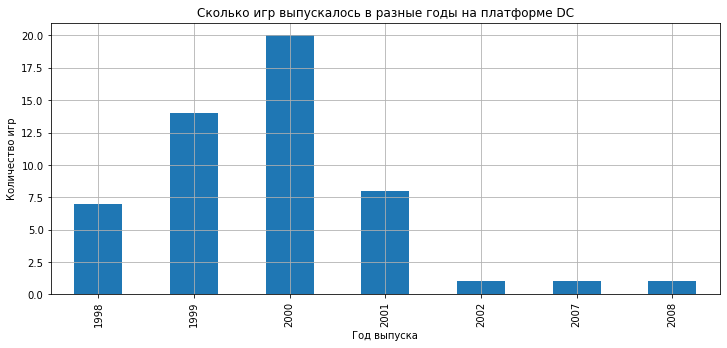

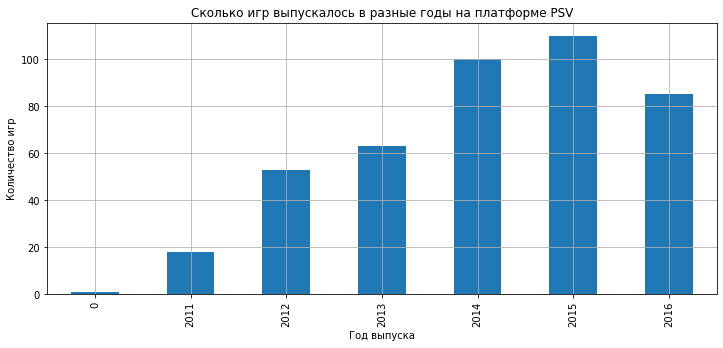

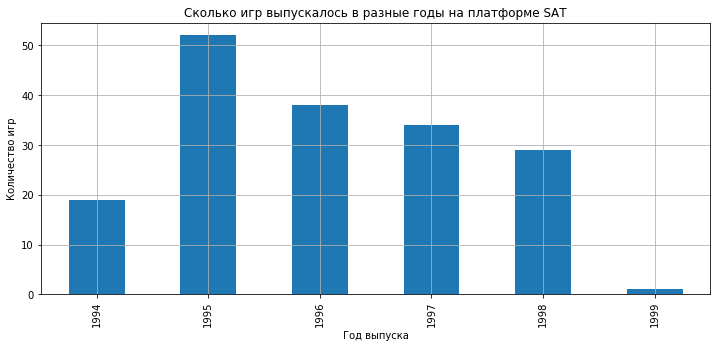

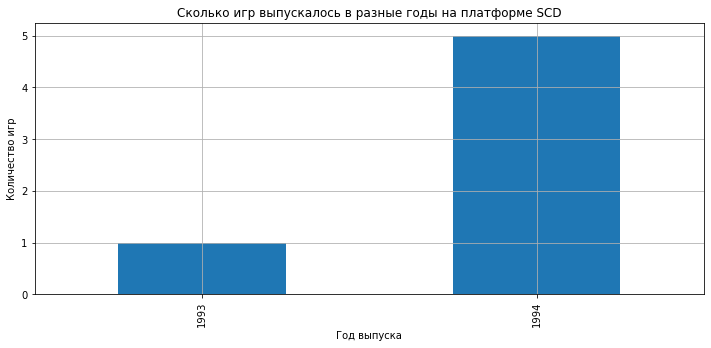

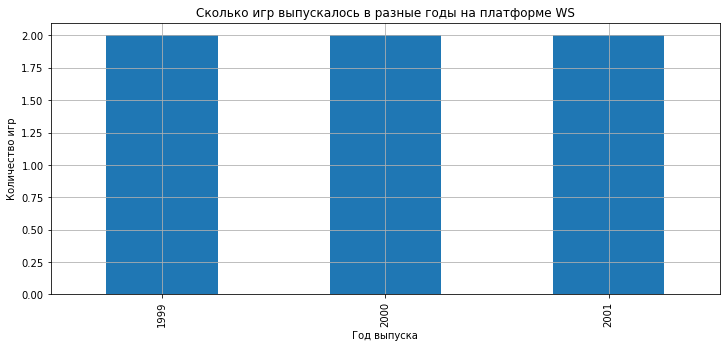

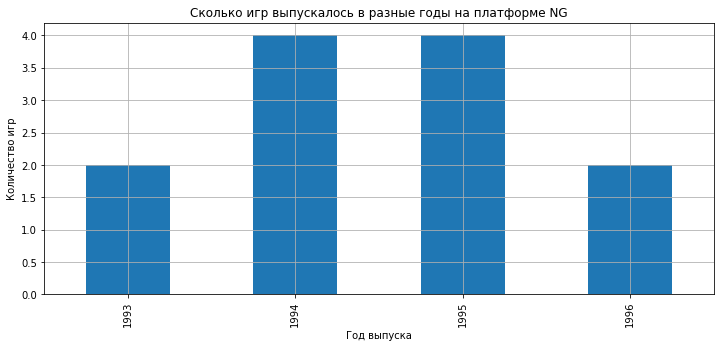

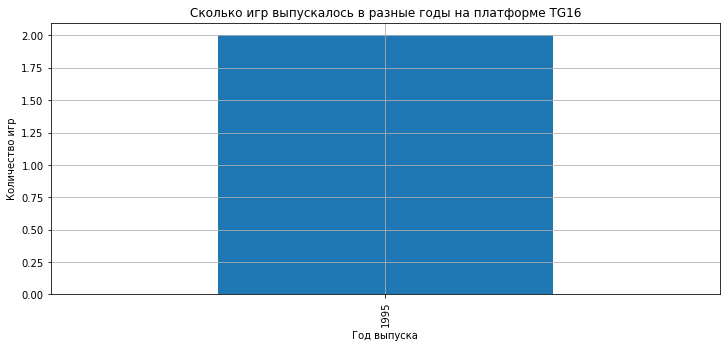

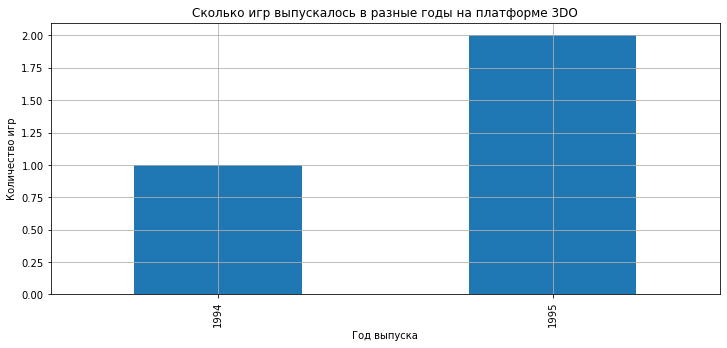

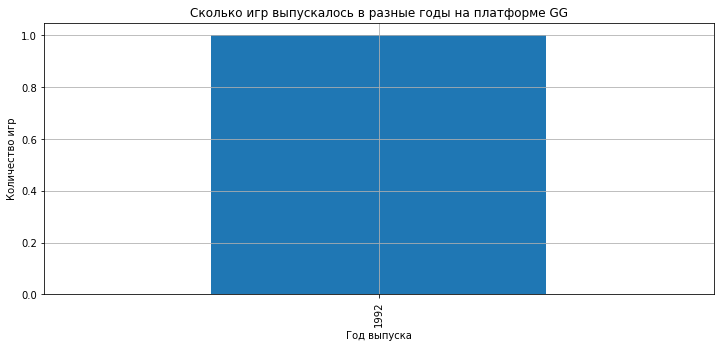

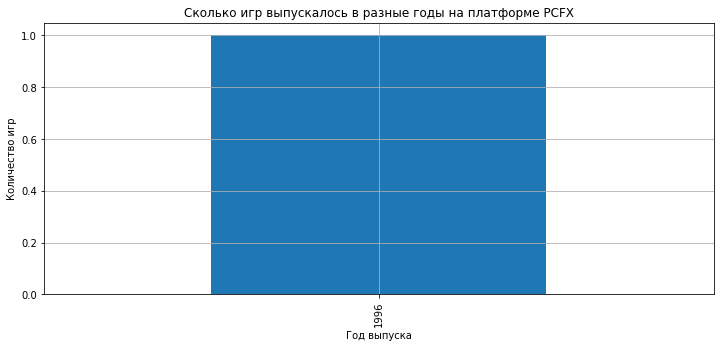

In [12]:
for p in platforms:
    try:
        games.query('platform==@p').pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', grid=True, figsize=(12, 5), legend=False, label=p, alpha=1)
    except:
        print('Ошибка при обработке данных по платформе', p) #not_games.append(p)  
    plt.title('Сколько игр выпускалось в разные годы на платформе '+str(p))
    plt.ylabel('Количество игр')
    plt.xlabel('Год выпуска')
    plt.show()
  

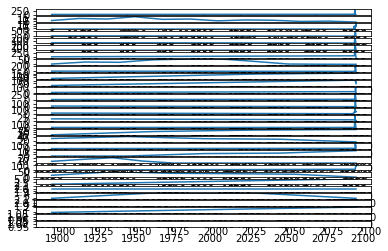

In [13]:
fig, axs = plt.subplots(len(platforms))

i = 0
for p in platforms:
    try:
        tmp = games.query('platform==@p').pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
        x = tmp['year_of_release'].tolist()
        y = tmp['name'].tolist()
        axs[i].plot(x, y)
    except:
        print('Ошибка при обработке данных по платформе', p)
    i += 1    

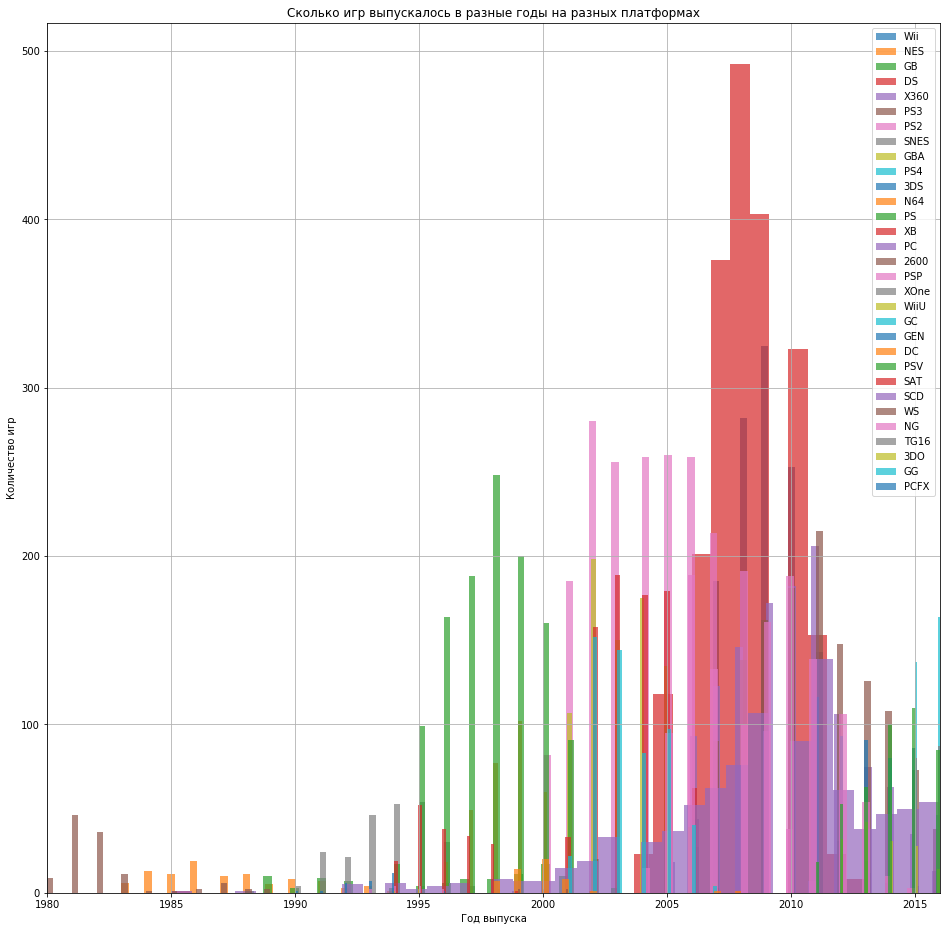

In [14]:
for p in platforms:
    games.query('year_of_release>0 and platform==@p')['year_of_release'].hist(bins=36, alpha=0.7, label=p, figsize=(16, 16))

plt.xlim(1980, 2016) 
plt.title('Сколько игр выпускалось в разные годы на разных платформах')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.legend()
plt.show()

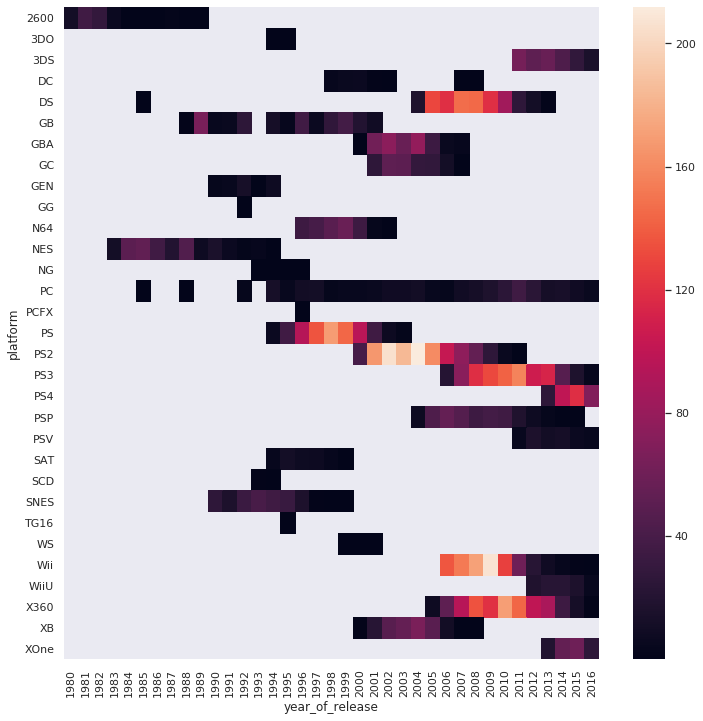

In [53]:
fig = plt.figure(figsize=(12,12))

tmp = games.query('year_of_release>0')
tmp = tmp.pivot_table(index=['platform'], columns=['year_of_release'], values=['sum_sales'], aggfunc='sum').droplevel(0,axis=1)

sns.heatmap(tmp)

Выберем ТОП-10 платформ по суммарным продажам
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


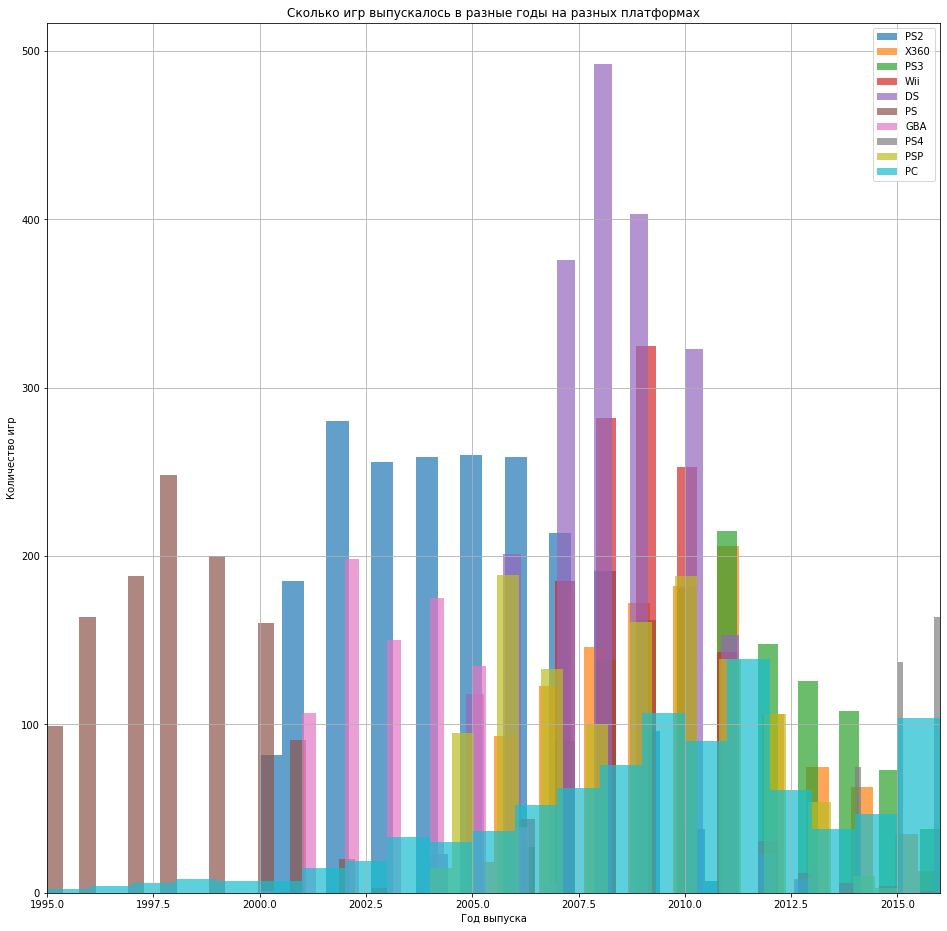

In [16]:
print('Выберем ТОП-10 платформ по суммарным продажам')
top10_platforms = games.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by = 'sum_sales', ascending = False).reset_index()
top10_platforms = top10_platforms.loc[:9]['platform'].tolist()
print(top10_platforms)

for p in top10_platforms:
    games.query('year_of_release>1994 and platform==@p')['year_of_release'].hist(bins=21, alpha=0.7, label=p, figsize=(16, 16))


plt.xlim(1995, 2016) 
plt.title('Сколько игр выпускалось в разные годы на разных платформах')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.legend()
plt.show()

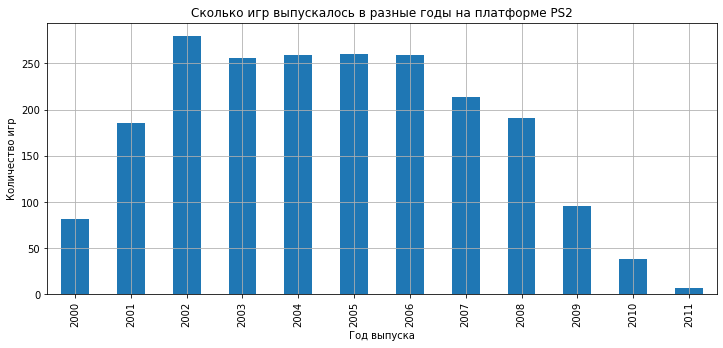

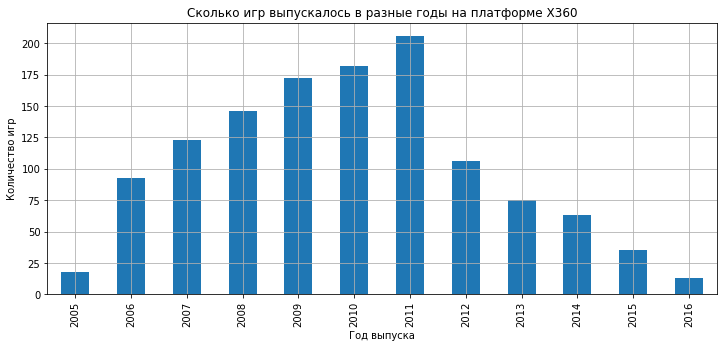

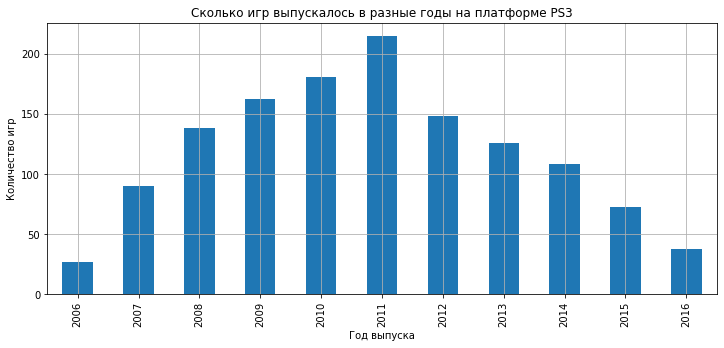

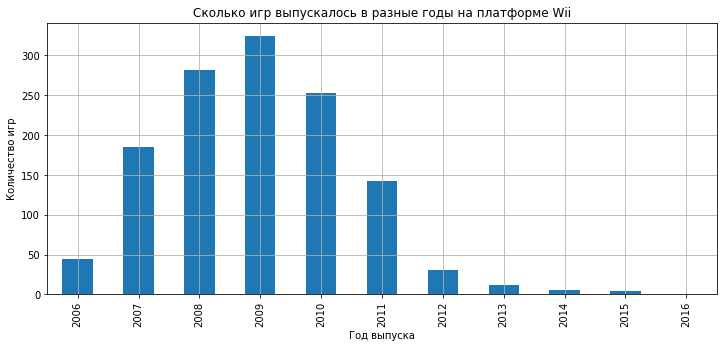

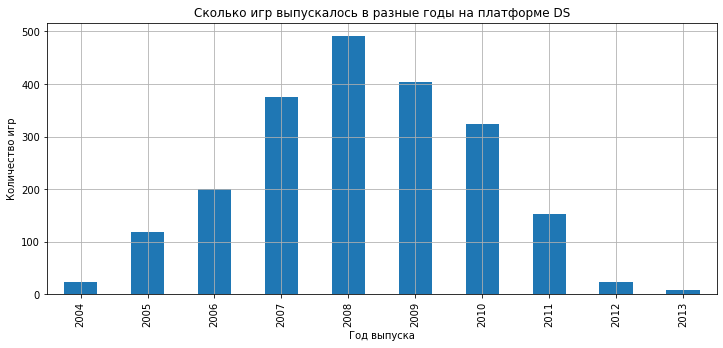

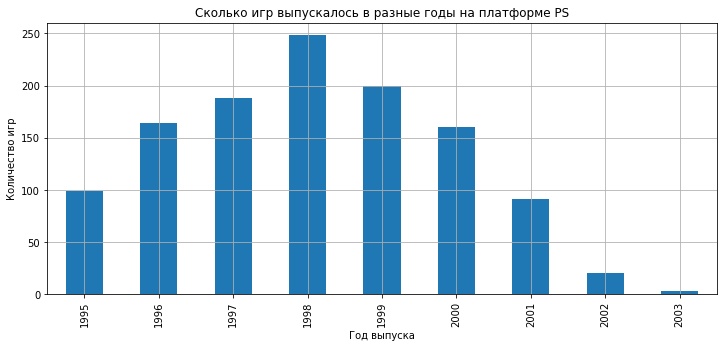

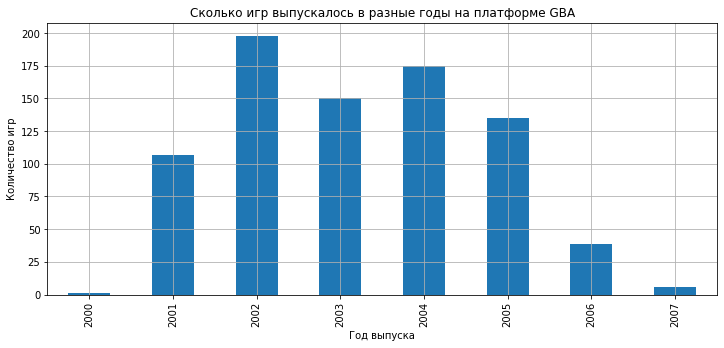

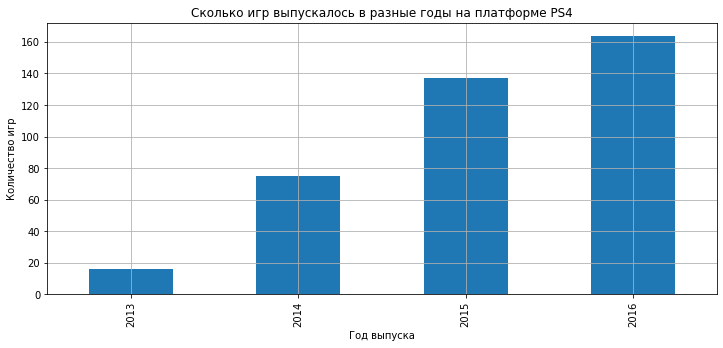

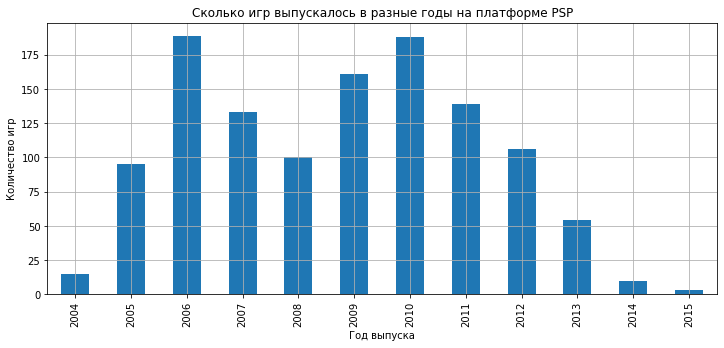

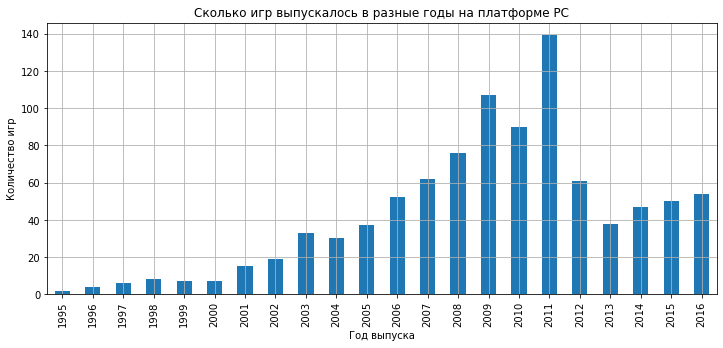

In [17]:
for p in top10_platforms:
    games.query('year_of_release>1994 and platform==@p').pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', grid=True, figsize=(12, 5), legend=False, label=p, alpha=1)
    plt.title('Сколько игр выпускалось в разные годы на платформе '+str(p))
    plt.ylabel('Количество игр')
    plt.xlabel('Год выпуска')
    plt.show()

### Выводы:
1. Платформа РС - проект долгоиграющий и не имеющий конкретной аппаратной платформы. Я бы его из рассмотрения касательно срока жизни платформ убрал.
2. Средний срок активной жизни консольной платформы - 5-7 лет.
3. Atari 2600 была довольно популярна в свое время. Она выпадает из нашего рассмотрения (по годам) и в ней был наивысший % незаполненных дат выхода игр.
4. Потенциально прибыльные платформы (из ТОП-10) это PS4 и PC (у PC наблюдается новый рост после спада). Не из ТОП-10: XOne и GEN - у них наблюдается рост.
5. 

In [18]:
exp_games = games.query('year_of_release>=2013') # отсекаем заодно и игры с неуказанным годом выхода

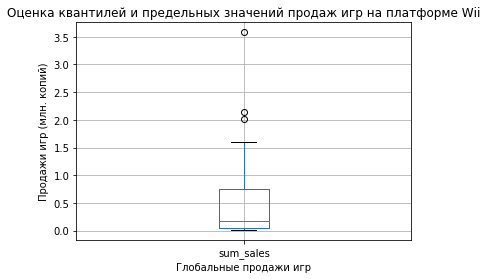

В основном продажи игр выпущенных на платформе Wii лежит между квантилями в промежутке от 0.04 до 0.76.  Значения выше 1.84 можно расценивать как выбросы.
Платформа NES не актуальна в рассматриваемый период 2013-2016гг
Платформа GB не актуальна в рассматриваемый период 2013-2016гг


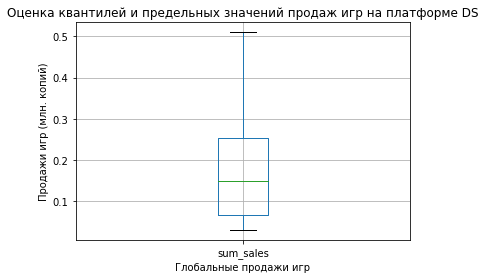

В основном продажи игр выпущенных на платформе DS лежит между квантилями в промежутке от 0.07 до 0.25.  Значения выше 0.52 можно расценивать как выбросы.


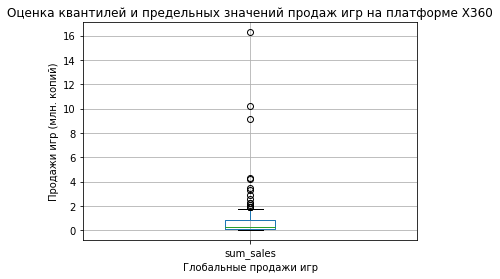

В основном продажи игр выпущенных на платформе X360 лежит между квантилями в промежутке от 0.08 до 0.8.  Значения выше 1.88 можно расценивать как выбросы.


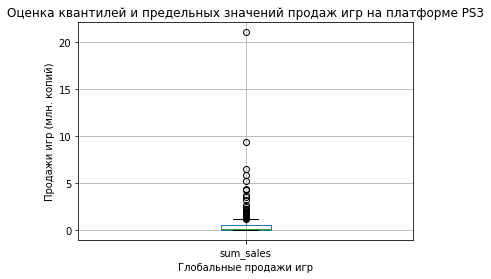

В основном продажи игр выпущенных на платформе PS3 лежит между квантилями в промежутке от 0.04 до 0.51.  Значения выше 1.22 можно расценивать как выбросы.
Платформа PS2 не актуальна в рассматриваемый период 2013-2016гг
Платформа SNES не актуальна в рассматриваемый период 2013-2016гг
Платформа GBA не актуальна в рассматриваемый период 2013-2016гг


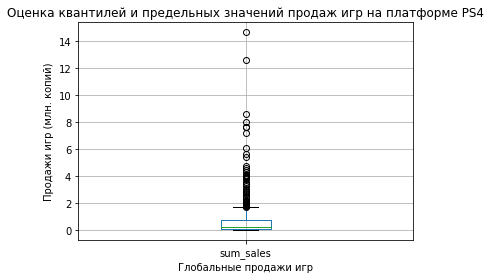

В основном продажи игр выпущенных на платформе PS4 лежит между квантилями в промежутке от 0.06 до 0.73.  Значения выше 1.74 можно расценивать как выбросы.


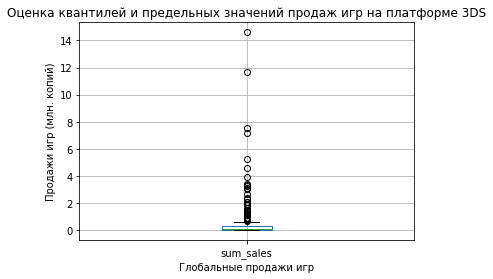

В основном продажи игр выпущенных на платформе 3DS лежит между квантилями в промежутке от 0.04 до 0.28.  Значения выше 0.64 можно расценивать как выбросы.
Платформа N64 не актуальна в рассматриваемый период 2013-2016гг
Платформа PS не актуальна в рассматриваемый период 2013-2016гг
Платформа XB не актуальна в рассматриваемый период 2013-2016гг


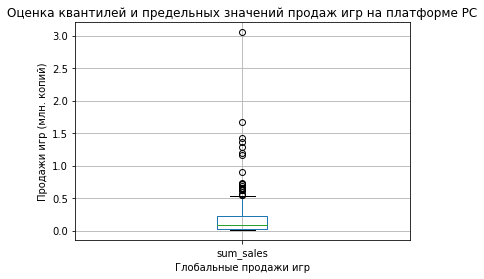

В основном продажи игр выпущенных на платформе PC лежит между квантилями в промежутке от 0.03 до 0.23.  Значения выше 0.53 можно расценивать как выбросы.
Платформа 2600 не актуальна в рассматриваемый период 2013-2016гг


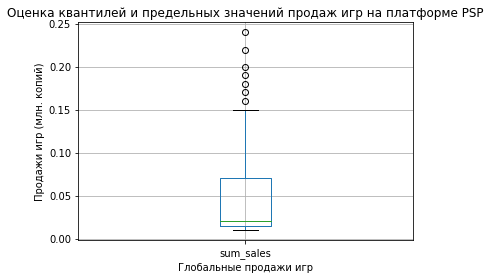

В основном продажи игр выпущенных на платформе PSP лежит между квантилями в промежутке от 0.02 до 0.07.  Значения выше 0.15 можно расценивать как выбросы.


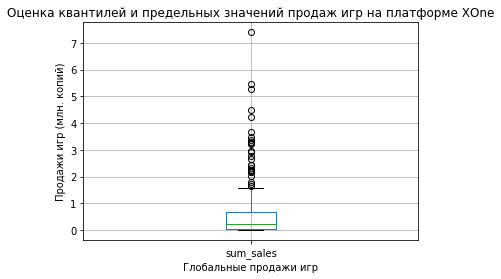

В основном продажи игр выпущенных на платформе XOne лежит между квантилями в промежутке от 0.06 до 0.68.  Значения выше 1.61 можно расценивать как выбросы.


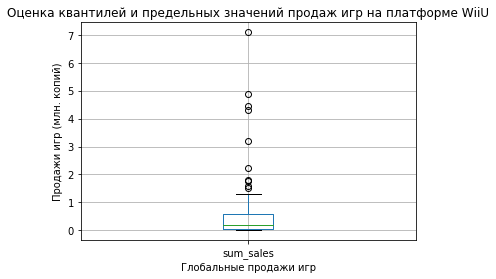

В основном продажи игр выпущенных на платформе WiiU лежит между квантилями в промежутке от 0.06 до 0.6.  Значения выше 1.41 можно расценивать как выбросы.
Платформа GC не актуальна в рассматриваемый период 2013-2016гг
Платформа GEN не актуальна в рассматриваемый период 2013-2016гг
Платформа DC не актуальна в рассматриваемый период 2013-2016гг


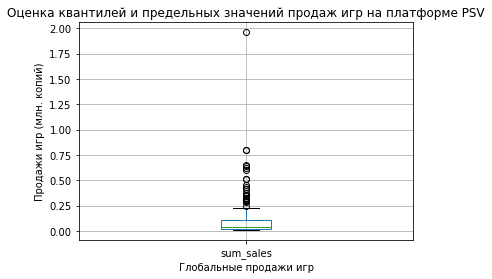

В основном продажи игр выпущенных на платформе PSV лежит между квантилями в промежутке от 0.02 до 0.11.  Значения выше 0.24 можно расценивать как выбросы.
Платформа SAT не актуальна в рассматриваемый период 2013-2016гг
Платформа SCD не актуальна в рассматриваемый период 2013-2016гг
Платформа WS не актуальна в рассматриваемый период 2013-2016гг
Платформа NG не актуальна в рассматриваемый период 2013-2016гг
Платформа TG16 не актуальна в рассматриваемый период 2013-2016гг
Платформа 3DO не актуальна в рассматриваемый период 2013-2016гг
Платформа GG не актуальна в рассматриваемый период 2013-2016гг
Платформа PCFX не актуальна в рассматриваемый период 2013-2016гг
   platform  max_sales  Q1 25%  Q3 75%
0       Wii       1.84    0.04    0.76
1        DS       0.52    0.07    0.25
2      X360       1.88    0.08    0.80
3       PS3       1.22    0.04    0.51
4       PS4       1.74    0.06    0.73
5       3DS       0.64    0.04    0.28
6        PC       0.53    0.03    0.23
7       PSP       0.15

In [19]:
mx_sales_per_platf = []

for p in platforms:
    sss = []
    exam = exp_games.query('platform==@p')['sum_sales'].reset_index()      
    crit = exam['sum_sales'].sum()
    if crit!=0:   
        exam.boxplot('sum_sales')
        plt.title('Оценка квантилей и предельных значений продаж игр на платформе '+str(p))
        plt.ylabel('Продажи игр (млн. копий)')
        plt.xlabel('Глобальные продажи игр')
        plt.show()
        q3,q1 = np.percentile(exam['sum_sales'],[75,25])
        q3 = round(q3, 2)
        q1 = round(q1, 2)
        iqr = q3-q1
        mx = round(q3+(1.5*iqr), 2) # максимальные продажи, исключая выбросы
        print(f'В основном продажи игр выпущенных на платформе {p} лежит между квантилями в промежутке от {q1} до {q3}.  Значения выше {mx} можно расценивать как выбросы.')
        sss.append(p)
        sss.append(mx)
        sss.append(q1)
        sss.append(q3)
        mx_sales_per_platf.append(sss)
    else: 
        print('Платформа', p, 'не актуальна в рассматриваемый период 2013-2016гг')  
    
mx_sales_per_platf = pd.DataFrame(data = mx_sales_per_platf , columns = ['platform','max_sales','Q1 25%', 'Q3 75%'])
print(mx_sales_per_platf)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


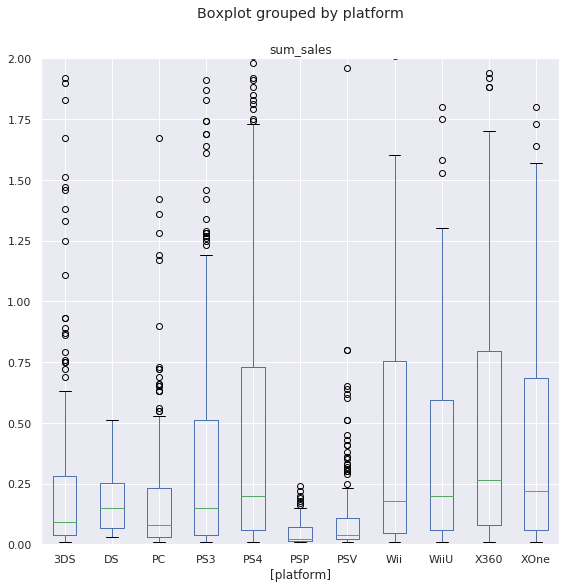

In [57]:
exp_games.boxplot(column=['sum_sales'], by=['platform'])
plt.ylim((0,2))
plt.show()

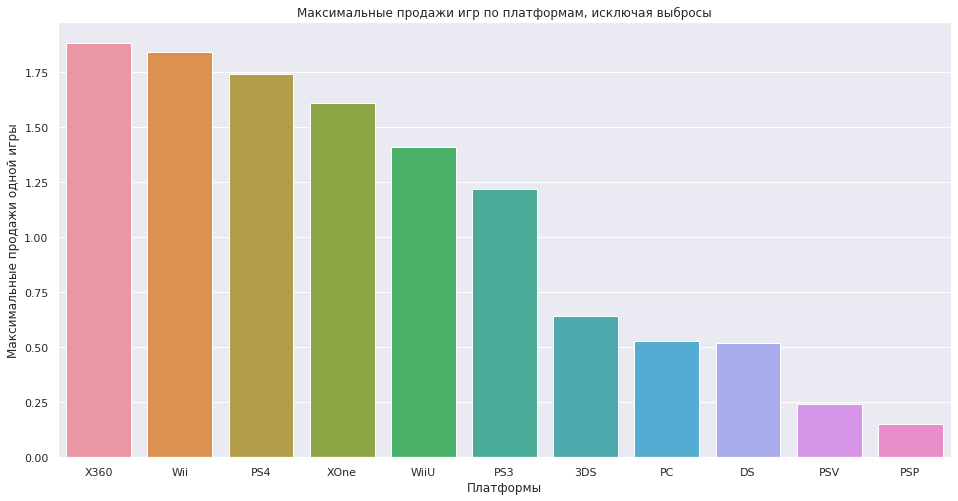

In [20]:
mx_sales_per_platf = mx_sales_per_platf.sort_values(by = 'max_sales', ascending = False)

sns.set(rc = {'figure.figsize':(16,8)})
sns.barplot(x=mx_sales_per_platf['platform'] ,y=mx_sales_per_platf['max_sales'])
plt.title('Максимальные продажи игр по платформам, исключая выбросы')
plt.ylabel('Максимальные продажи одной игры')
plt.xlabel('Платформы')
plt.show()

### Выводы:
1. Для платформ NES, GB и GEN максимальные продажи (за вычетом выбросов) гораздо выше чем по другим платформам, а для платформ 3DO, GG и PCFX - гораздо ниже.
2. Данные брал за 2013-2016гг.

Анализируем связь между отзывами и продажами по платформе: X360
Корреляция между продажами и отзывами критиков: 0.461 0.461
Корреляция между продажами и отзывами пользователей: 0.214 0.214


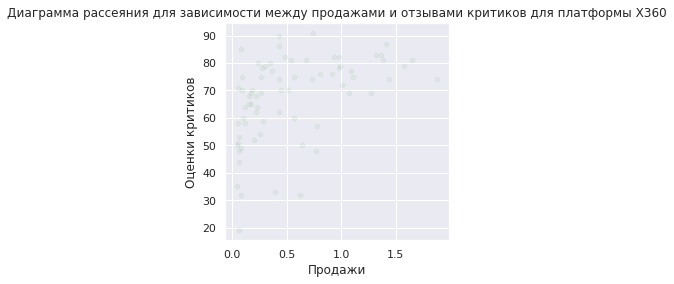

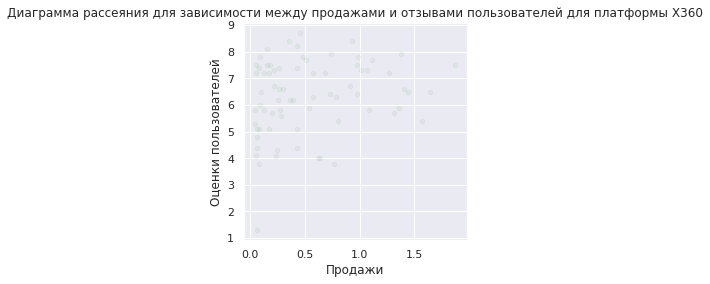

---------------------------------------------------------------------------------------------------------
Анализируем связь между отзывами и продажами по платформе: Wii
Данные по платформе Wii неполные. Анализ не проводился.
Анализируем связь между отзывами и продажами по платформе: PS4
Корреляция между продажами и отзывами критиков: 0.273 0.273
Корреляция между продажами и отзывами пользователей: 0.009 0.009


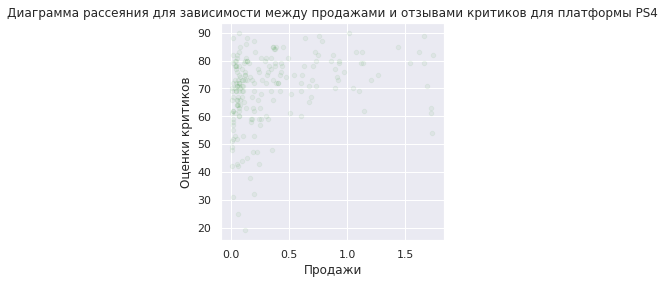

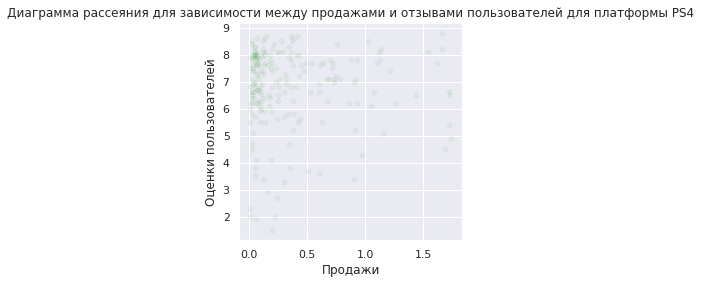

---------------------------------------------------------------------------------------------------------
Анализируем связь между отзывами и продажами по платформе: XOne
Корреляция между продажами и отзывами критиков: 0.411 0.411
Корреляция между продажами и отзывами пользователей: 0.048 0.048


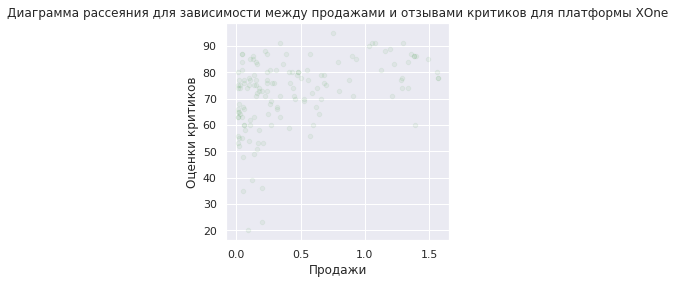

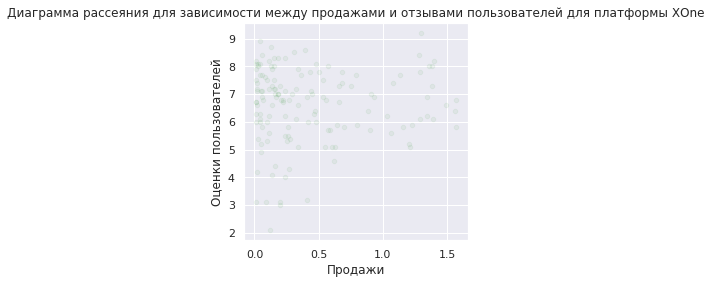

---------------------------------------------------------------------------------------------------------
Анализируем связь между отзывами и продажами по платформе: WiiU
Корреляция между продажами и отзывами критиков: 0.44 0.44
Корреляция между продажами и отзывами пользователей: 0.402 0.402


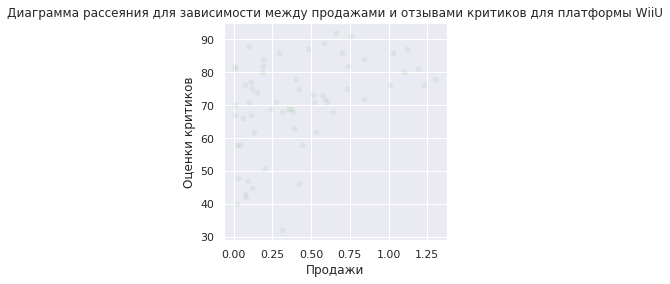

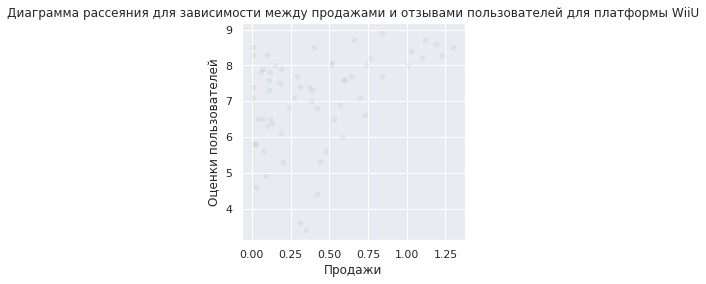

---------------------------------------------------------------------------------------------------------


In [21]:
mx_sales_per_platf = mx_sales_per_platf.head(5)
top5_platforms = mx_sales_per_platf['platform'].tolist()

sns.set(rc = {'figure.figsize':(4,4)})
for p in top5_platforms:
    print('Анализируем связь между отзывами и продажами по платформе:', p)
    exp_games_p = exp_games.query('platform==@p and (critic_score!=0 and user_score!=0)') # выбираем платформу и чтобы для игры оценки были
    max_val = mx_sales_per_platf.query('platform==@p')['max_sales'].max()
    exp_games_p = exp_games_p.query('sum_sales<=@max_val')
    crit = exp_games_p['platform'].count()
    if crit!=0:
        print('Корреляция между продажами и отзывами критиков:', round(exp_games_p['sum_sales'].corr(exp_games_p['critic_score']), 3), round(exp_games_p['critic_score'].corr(exp_games_p['sum_sales']), 3))
        print('Корреляция между продажами и отзывами пользователей:', round(exp_games_p['sum_sales'].corr(exp_games_p['user_score']), 3), round(exp_games_p['user_score'].corr(exp_games_p['sum_sales']), 3))

        exp_games_p.plot(x='sum_sales', y='critic_score', kind='scatter', alpha=0.05, color='Green') 
        plt.title('Диаграмма рассеяния для зависимости между продажами и отзывами критиков для платформы '+str(p))
        plt.ylabel('Оценки критиков')
        plt.xlabel('Продажи')
        plt.show()

        exp_games_p.plot(x='sum_sales', y='user_score', kind='scatter', alpha=0.05, color='Green') 
        plt.title('Диаграмма рассеяния для зависимости между продажами и отзывами пользователей для платформы '+str(p))
        plt.ylabel('Оценки пользователей')
        plt.xlabel('Продажи')    
        plt.show()
        print('---------------------------------------------------------------------------------------------------------')
    else: print('Данные по платформе', p, 'неполные. Анализ не проводился.')

### Выводы:
1. Заметна положительная зависимость между оценками и продажами, по каким-то платформам сильнее, по каким-то слабее, но в целом не очень сильная.
2. Корелляция с оценками критиков гораздо сильнее, чем с оценками пользователей.
3. Корреляции продаж с оценками пользователей на платформе PC практически нет.
4. Форма диаграмм рассеяния для всех платформ примерно одинакова.

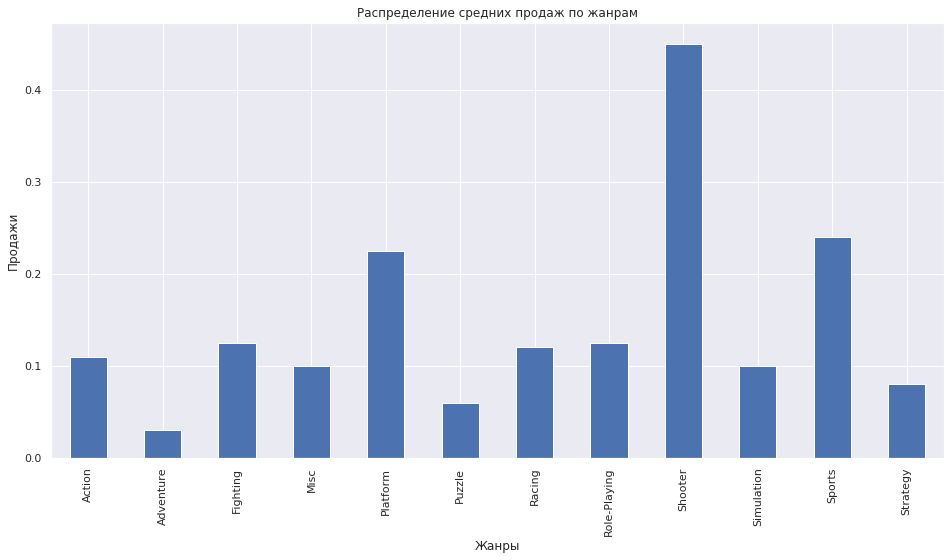

In [22]:
exp_games.query('genre!="unknown"').pivot_table(index='genre', values='sum_sales', aggfunc='median').plot(kind='bar', grid=True, figsize=(16, 8), legend=False)
plt.title('Распределение средних продаж по жанрам')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

#for g in genres:
#    games.query('platform==@p')['sum_sales'].reset_index()

### Выводы:
1. По средним продажам лидирует жанр Shooter.
2. Средние продажи можно заметить у группы жанров: Platform, Sports
3. Самые низкие продажи у жанров: Adventure, Puzzle<br>
P.S. Данные брал за 2013-2016гг.

## Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5).
Опишите различия в долях продаж.

Выберем ТОП-5 платфор по Северной Америке: ['PS4', 'XOne', 'X360', 'PS3', '3DS']
Их доля в общих продажах по Северной Америке:


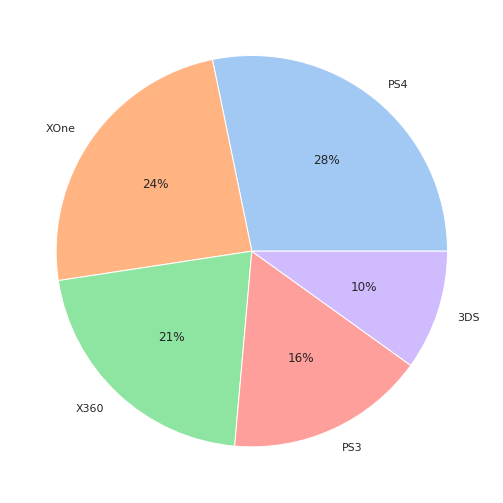

In [23]:
pl_top5_na = exp_games.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False).reset_index()
pl_top5_na_name = pl_top5_na.loc[:4]['platform'].tolist()
print('Выберем ТОП-5 платфор по Северной Америке:', pl_top5_na_name)
print('Их доля в общих продажах по Северной Америке:')
colors = sns.color_palette('pastel')[0:5]
sns.set(rc = {'figure.figsize':(9,9)})
pl_top5_na = pl_top5_na.query('platform in @pl_top5_na_name')
plt.pie(x = pl_top5_na['na_sales'], labels = pl_top5_na['platform'], colors = colors, autopct='%.0f%%')
plt.show()

Выберем ТОП-5 платфор по Европе: ['PS4', 'PS3', 'XOne', 'X360', '3DS']
Их доля в общих продажах по Европе:


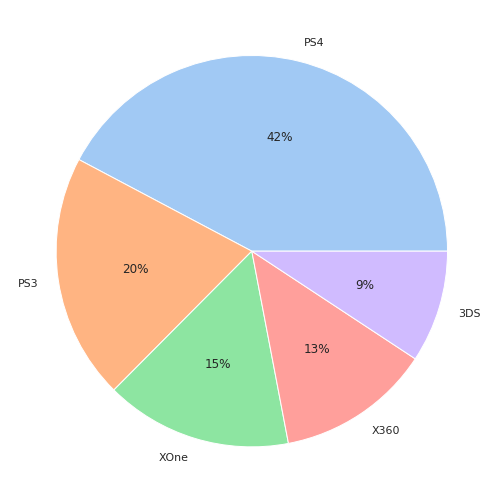

In [24]:
pl_top5_eu = exp_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending = False).reset_index()
pl_top5_eu_name = pl_top5_eu.loc[:4]['platform'].tolist()
print('Выберем ТОП-5 платфор по Европе:', pl_top5_eu_name)
print('Их доля в общих продажах по Европе:')
colors = sns.color_palette('pastel')[0:5]
sns.set(rc = {'figure.figsize':(9,9)})
pl_top5_eu = pl_top5_eu.query('platform in @pl_top5_eu_name')
plt.pie(x = pl_top5_eu['eu_sales'], labels = pl_top5_eu['platform'], colors = colors, autopct='%.0f%%')
plt.show()

Выберем ТОП-5 платфор по Японии: ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']
Их доля в общих продажах по Японии:


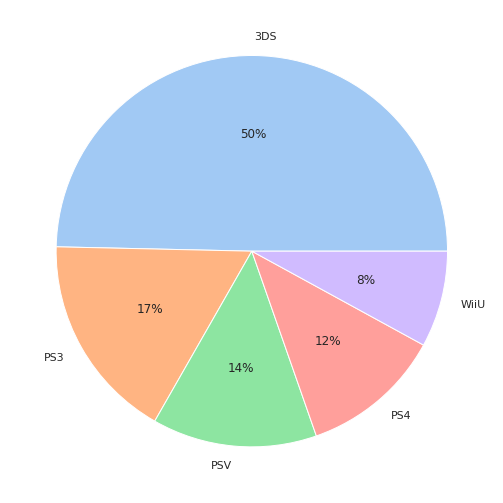

In [25]:
pl_top5_jp = exp_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending = False).reset_index()
pl_top5_jp_name = pl_top5_jp.loc[:4]['platform'].tolist()
print('Выберем ТОП-5 платфор по Японии:', pl_top5_jp_name)
print('Их доля в общих продажах по Японии:')
colors = sns.color_palette('pastel')[0:5]
sns.set(rc = {'figure.figsize':(9,9)})
pl_top5_jp = pl_top5_jp.query('platform in @pl_top5_jp_name')
plt.pie(x = pl_top5_jp['jp_sales'], labels = pl_top5_jp['platform'], colors = colors, autopct='%.0f%%')
plt.show()

### Выводы:
1. Особых различий в долях продаж ТОП-5 платформ по 3м рассматриваемым регионам не обнаружено. Картина везде примерно одинаковая. 
2. ТОП-5 платфор по Северной Америке (в порядке убывания популярности): ['PS4', 'XOne', 'X360', 'PS3', '3DS']
3. ТОП-5 платфор по Европе (в порядке убывания популярности): ['PS4', 'PS3', 'XOne', 'X360', '3DS']
4. ТОП-5 платфор по Японии (в порядке убывания популярности): ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']
5. По всем 3м регионам лидирует платформа PS4.
6. Картина лидеров по Европе и Северной Америке близки друг к другу и отличаются от Японии.<br>
P.S. Данные брал за 2013-2016гг.

Выберем ТОП-5 жанров по Северной Америке: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
Их доля в общих продажах по Северной Америке:


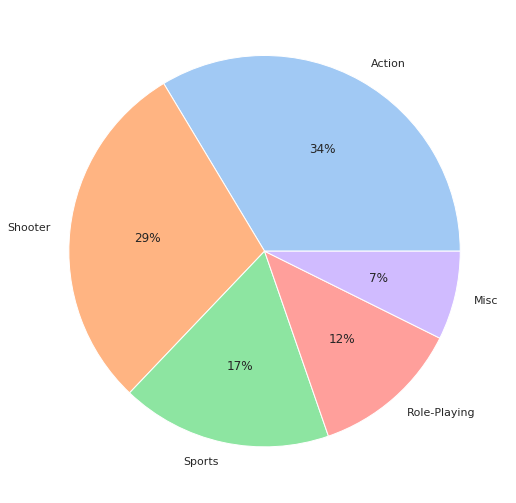

In [26]:
gn_top5_na = exp_games.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False).reset_index()
gn_top5_na_name = gn_top5_na.loc[:4]['genre'].tolist()
print('Выберем ТОП-5 жанров по Северной Америке:', gn_top5_na_name)
print('Их доля в общих продажах по Северной Америке:')
colors = sns.color_palette('pastel')[0:5]
sns.set(rc = {'figure.figsize':(9,9)})
gn_top5_na = gn_top5_na.query('genre in @gn_top5_na_name')
plt.pie(x = gn_top5_na['na_sales'], labels = gn_top5_na['genre'], colors = colors, autopct='%.0f%%')
plt.show()

Выберем ТОП-5 жанров по Европе: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
Их доля в общих продажах по Европе:


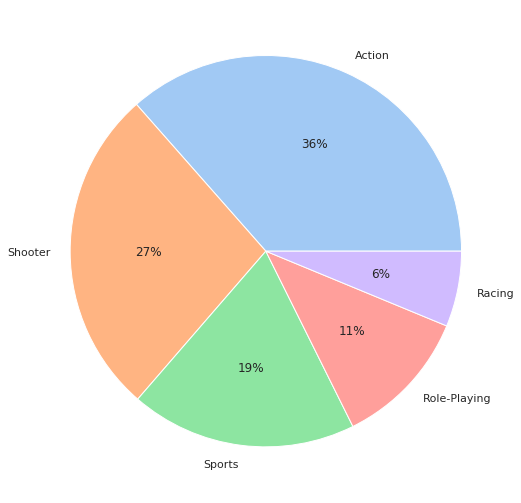

In [27]:
gn_top5_eu = exp_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending = False).reset_index()
gn_top5_eu_name = gn_top5_eu.loc[:4]['genre'].tolist()
print('Выберем ТОП-5 жанров по Европе:', gn_top5_eu_name)
print('Их доля в общих продажах по Европе:')
colors = sns.color_palette('pastel')[0:5]
sns.set(rc = {'figure.figsize':(9,9)})
gn_top5_eu = gn_top5_eu.query('genre in @gn_top5_eu_name')
plt.pie(x = gn_top5_eu['eu_sales'], labels = gn_top5_eu['genre'], colors = colors, autopct='%.0f%%')
plt.show()

Выберем ТОП-5 жанров по Японии: ['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter']
Их доля в общих продажах по Японии:


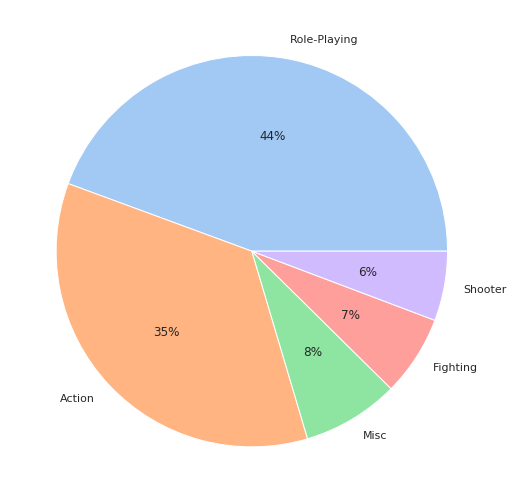

In [28]:
gn_top5_jp = exp_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending = False).reset_index()
gn_top5_jp_name = gn_top5_jp.loc[:4]['genre'].tolist()
print('Выберем ТОП-5 жанров по Японии:', gn_top5_jp_name)
print('Их доля в общих продажах по Японии:')
colors = sns.color_palette('pastel')[0:5]
sns.set(rc = {'figure.figsize':(9,9)})
gn_top5_jp = gn_top5_jp.query('genre in @gn_top5_jp_name')
plt.pie(x = gn_top5_jp['jp_sales'], labels = gn_top5_jp['genre'], colors = colors, autopct='%.0f%%')
plt.show()

### Выводы:
1. В Японии обосо популярен жанр Role-Playing. В Европе и Северной Америке - Action. (ничего не поменялось при пересчете)
2. ТОП-5 жанров по Северной Америке (в порядке убывания популярности): ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
3. ТОП-5 жанров по Европе (в порядке убывания популярности): ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
4. ТОП-5 жанров по Японии (в порядке убывания популярности): ['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter']
5. По всем 3м регионам лидируют жанры Action, Sports, Misc.
6. Картина лидеров по Европе и Северной Америке близки друг к другу и отличаются от Японии.<br>
P.S. Данные брал за 2013-2016гг.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».<br>
Уникальные названия рейтингов: ['E' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']:
* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. <b>Первоначально "K-A" ("Kids to Adults")</b> <u>(т.е. К-А надо перевести в Е для корректности статистики)</u>
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.
* «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

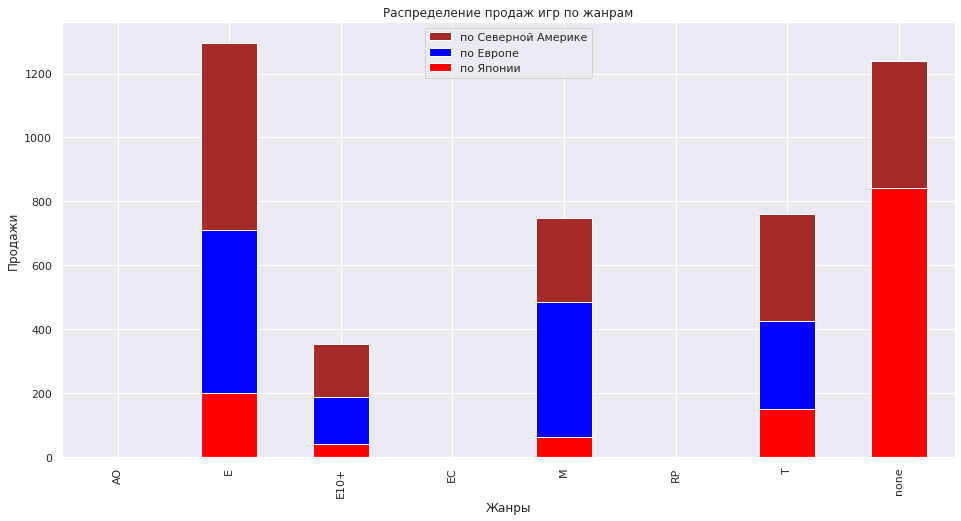

In [29]:
ax = games.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(16, 8), legend=True, label='Северная Америка', color='Brown')
bx = games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(ax=ax, kind='bar', grid=True, figsize=(16, 8), legend=True, label='Европа', color='Blue')
games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(ax=bx, kind='bar', grid=True, figsize=(16, 8), legend=True, label='Япония', color="Red")
plt.title('Распределение продаж игр по жанрам')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.legend(['по Северной Америке', 'по Европе', 'по Японии'])
plt.show()

### Выводы:
1. Продажи игр с рейтингами AO, EC, RP - ничтожно малы
2. Можно сказать, что есть зависимость между продажами и рейтингом игр. Игры подходящие более широкой аудитории (с рейтингом "Е") имеют наибольшее количество продаж.

# Проверка гипотез:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
Это будет нулевая гипотеза. Альтернативная ей будет "Средние пользовательские рейтинги платформ Xbox One и PC разные"

In [30]:
print('Средние пользовательские рейтинги платформы Xbox One', round(exp_games.query('platform=="XOne" and user_score!=0')['user_score'].mean(),2), 'из 10')
print('Средние пользовательские рейтинги платформы PC', round(exp_games.query('platform=="PC" and user_score!=0')['user_score'].mean(),2), 'из 10')

results = st.ttest_ind (exp_games.query('platform=="XOne" and user_score!=0')['user_score'], exp_games.query('platform=="PC" and user_score!=0')['user_score'], equal_var=False)
print('Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей:')
print('p-значение: ', results.pvalue)
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средние рейтинги различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средние рейтинги НЕ различаются")

Средние пользовательские рейтинги платформы Xbox One 6.52 из 10
Средние пользовательские рейтинги платформы PC 6.27 из 10
Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей:
p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу. Средние рейтинги НЕ различаются


### Средние пользовательские рейтинги жанров Action и Sports разные.
Это будет альтернативная гипотеза. А нулевая будет "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые"

In [31]:
print('Средние пользовательские рейтинги жанра Action', round(exp_games.query('genre=="Action" and user_score!=0')['user_score'].mean(),2), 'из 10')
print('Средние пользовательские рейтинги жанра Sports', round(exp_games.query('genre=="Sports" and user_score!=0')['user_score'].mean(),2), 'из 10')

results = st.ttest_ind (exp_games.query('genre=="Action" and user_score!=0')['user_score'], exp_games.query('genre=="Sports" and user_score!=0')['user_score'], equal_var=False)
print('Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей:')
print('p-значение: ', results.pvalue)
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средние рейтинги различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средние рейтинги НЕ различаются")

Средние пользовательские рейтинги жанра Action 6.84 из 10
Средние пользовательские рейтинги жанра Sports 5.24 из 10
Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей:
p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу. Средние рейтинги различаются.


### Выводы:
1. Средние пользовательские рейтинги платформ Xbox One и PC <s>разные</s> не различаются.
2. Средние пользовательские рейтинги жанров Action и Sports разные.
<br>
P.S. В обоих случаях пороговое значение брал обычное - 0.05, использовал метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей,т.к. он больше всего подходит по условиям задач.

# Общий вывод
1. Потенциально прибыльные платформы (из ТОП-10) это PS4 и PC (у PC наблюдается новый рост после спада). Не из ТОП-10: XOne и GEN - у них наблюдается рост. Прочие платформы либо "умерли", либо "умирают".
2. Потенциально прибыльные жанры: Action, Sports, Misc.
3. Потенциально прибыльные игры с возрастными рейтингами: "Е", "М" и "Т".
4. Если от рекламной кампании нужен гарантированный результат, то лучше вкладываться в игры удовлетворяющие описанным выше критериям.